## Home Loan Prediction 

### 1.Import required packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_theme(color_codes = True)
pd.set_option('display.max_columns', None) 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### 2. Read the Data

In [3]:
df_train = pd.read_csv('loan_prediction_train.csv')
df_train

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


### 3. Basic Checkup

**information of the columns**

In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


datatypes contains [object, float64, int64]

**shape of the dataset**

In [5]:
df_train.shape


(614, 13)

total 614 rows of data are available for train the model and 13 columns

**no of columns**

In [6]:
df_train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

### 4. Drop Unnecessary Columns

we can drop the columns LoanID because it contain unique identifiers

In [7]:
df_train.drop('Loan_ID', axis = 1, inplace=True)


### 5. Divide the data into numerical and categorical columns

In [8]:
df_train_cat = df_train.select_dtypes(include=['object','category']).columns.tolist()
df_train_num = df_train.select_dtypes(exclude=['object','category']).columns.tolist()
df_train_cat, df_train_num

(['Gender',
  'Married',
  'Dependents',
  'Education',
  'Self_Employed',
  'Property_Area',
  'Loan_Status'],
 ['ApplicantIncome',
  'CoapplicantIncome',
  'LoanAmount',
  'Loan_Amount_Term',
  'Credit_History'])

### 6. Univariate Analysis

**a. categorical columns**

In [9]:
df_train_cat

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [10]:
len(df_train_cat)

7

- total 7 number of categorical columns are present

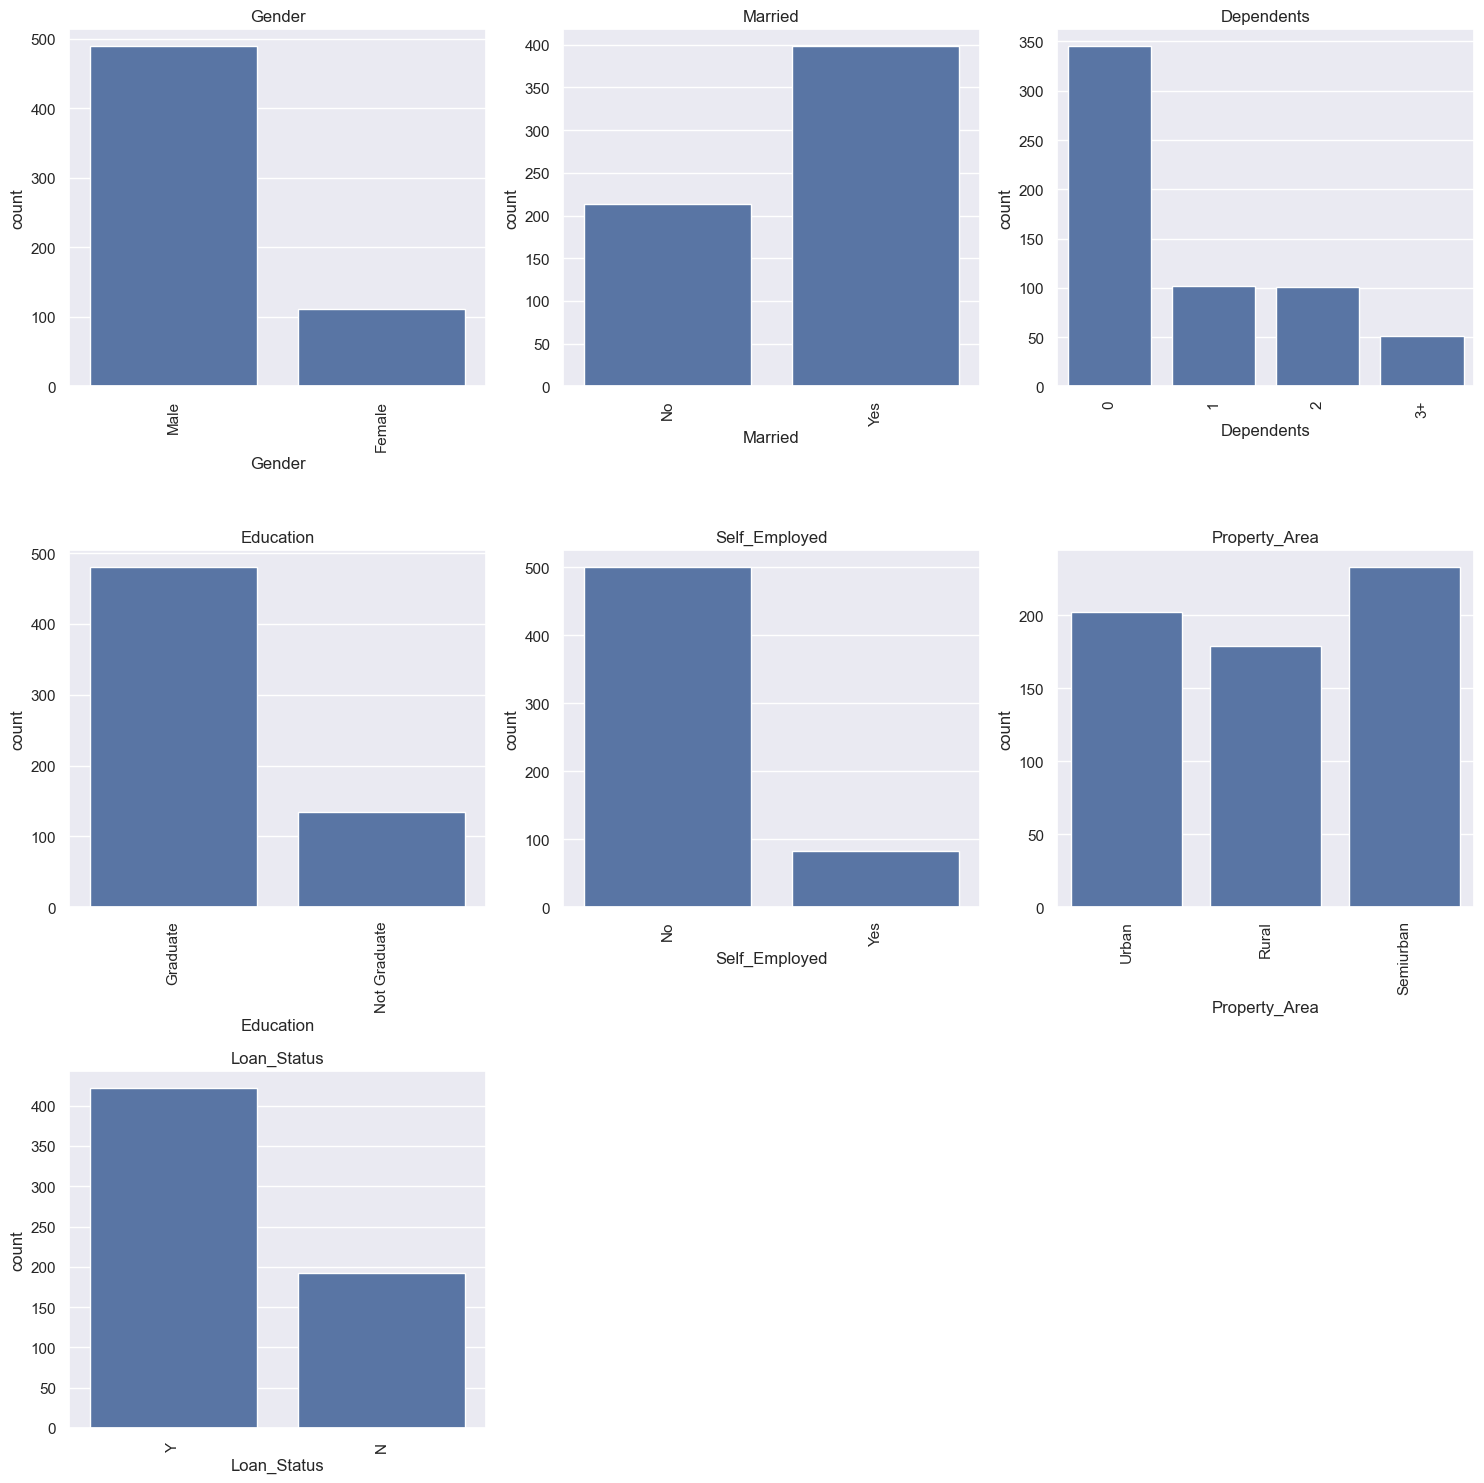

In [11]:
cat_vars = df_train.select_dtypes(include=['object','category']).columns.tolist()
# create a figure with subplots
num_cols = len(df_train_cat)
num_rows = (num_cols + 2)//3
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize = (15,5*num_rows))
axs = axs.flatten() 

# create a countplot using the seabron
for i, var in enumerate(cat_vars):
    top_values = df_train[var].value_counts().nlargest(6).index
    filtered_df = df_train[df_train[var].isin(top_values)]
    sns.countplot(x=var, data = filtered_df, ax=axs[i])
    axs[i].set_title(var)
    axs[i].tick_params(axis = 'x', rotation=90)

# remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])
# adjusting  spacing between subplots
fig.tight_layout()

# show plot
plt.show()

**b.Numerical columns** 

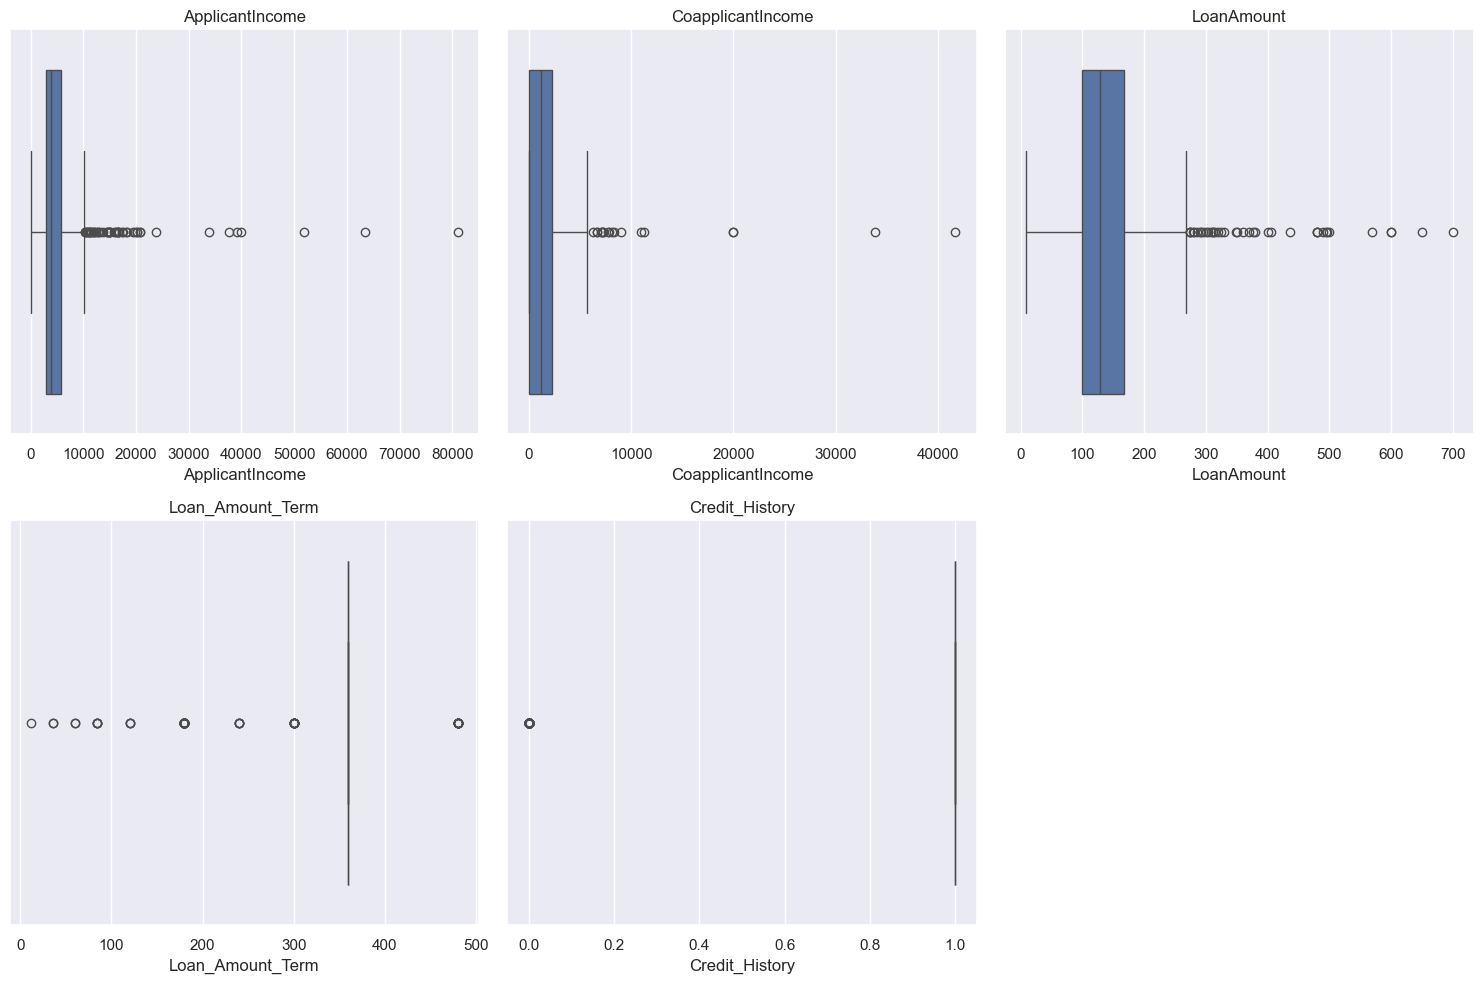

In [12]:
# get the all numerical columns
num_vars = df_train.select_dtypes(include=['int', 'float']).columns.tolist()

# create figure with subplots
num_cols = len(num_vars)
num_rows = (num_cols + 2)//3
fig,axs = plt.subplots(nrows= num_rows, ncols=3, figsize = (15,5*num_rows))
axs = axs.flatten()

# create a boxplot for each numerical variable using seaborn
for i, var in enumerate(num_vars):
    sns.boxplot(x=df_train[var], ax = axs[i])
    axs[i].set_title(var)

# remove the extra empty subplots if needed
if num_cols<len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

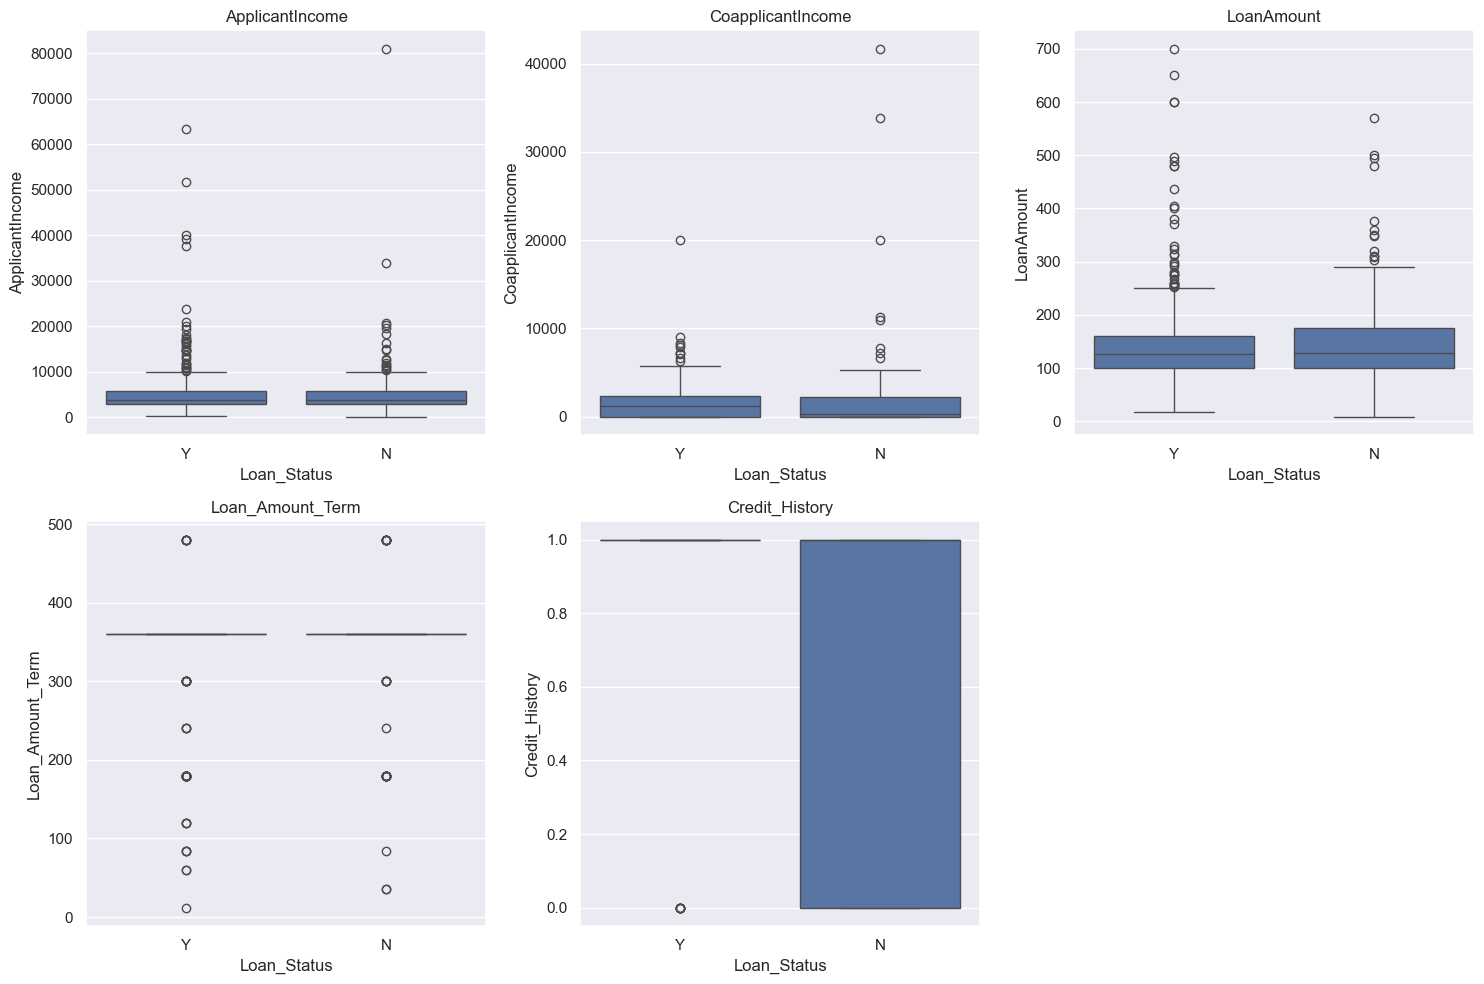

In [13]:
# Get the names of all columns with data type 'int'
int_vars = df_train.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a box plot for each integer variable using Seaborn with hue='attrition'
for i, var in enumerate(int_vars):
    sns.boxplot(y=var, x='Loan_Status', data=df_train, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

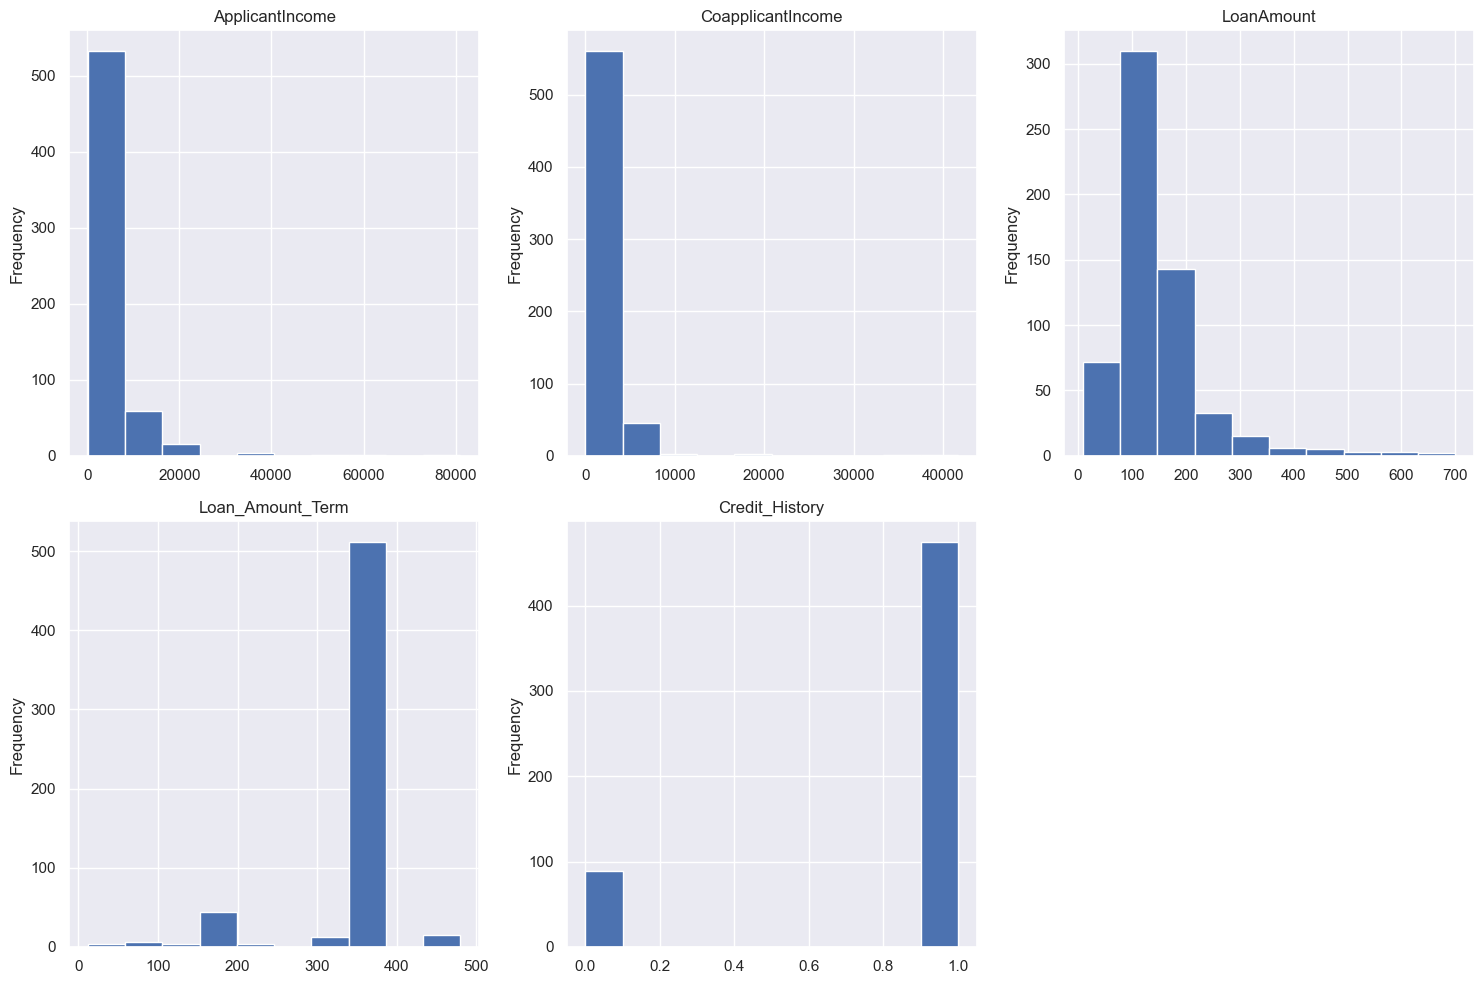

In [14]:
# Get the names of all columns with data type 'int'
int_vars = df_train.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable
for i, var in enumerate(int_vars):
    df_train[var].plot.hist(ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

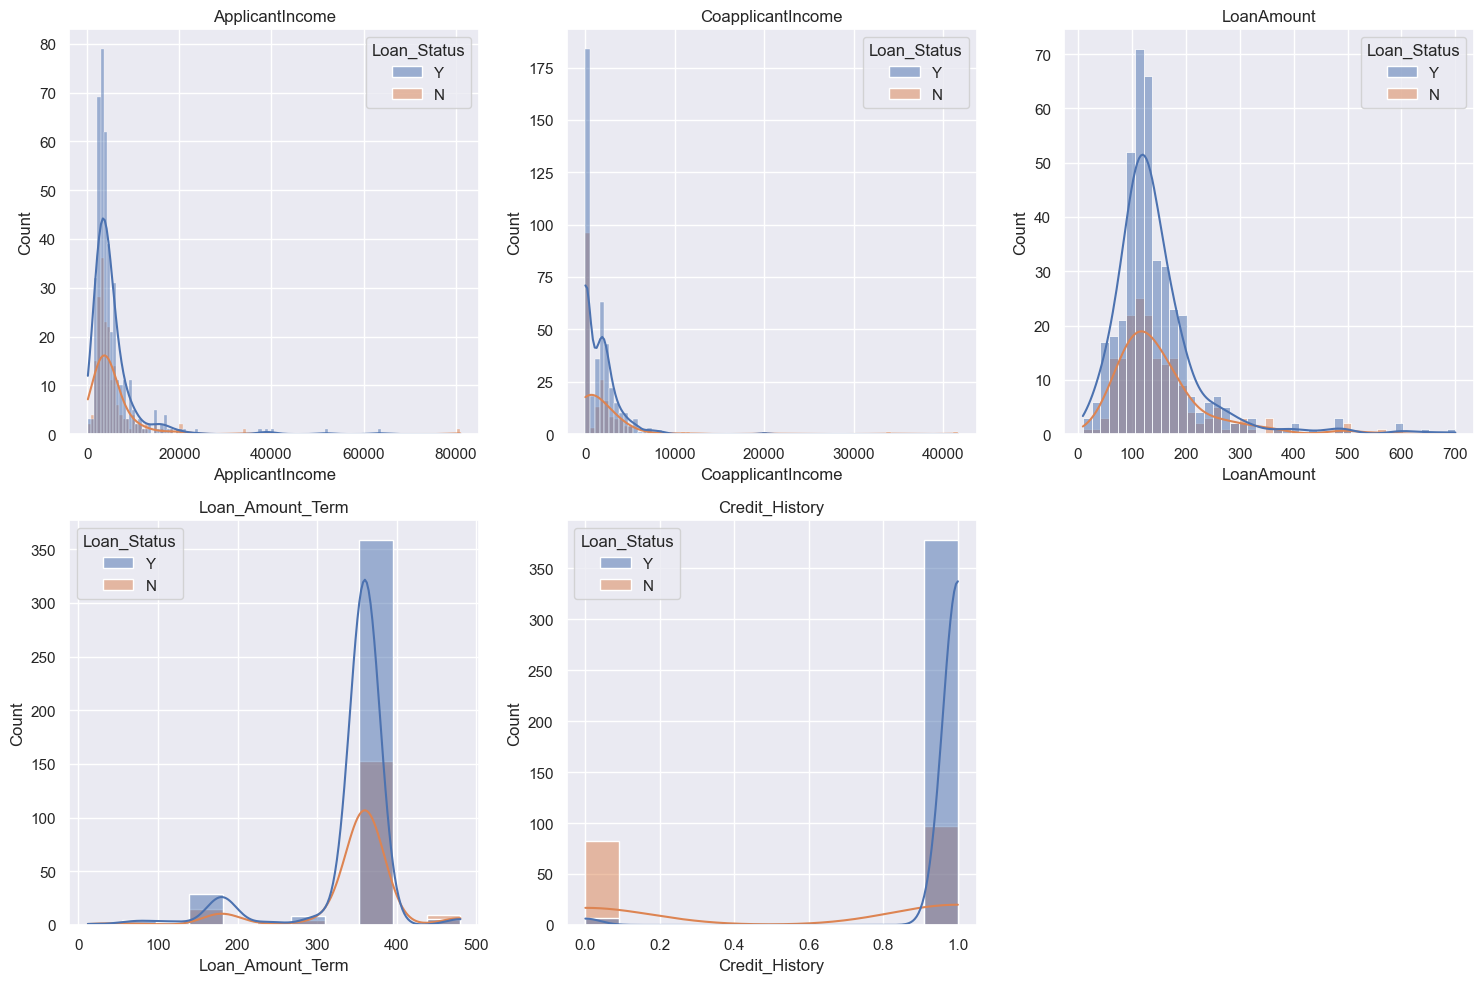

In [15]:
# Get the names of all columns with data type 'int'
int_vars = df_train.select_dtypes(include=['int', 'float']).columns.tolist()

# Create a figure with subplots
num_cols = len(int_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a histogram for each integer variable with hue='Attrition'
for i, var in enumerate(int_vars):
    sns.histplot(data=df_train, x=var, 
                 hue='Loan_Status', kde=True, ax=axs[i])
    axs[i].set_title(var)

# Remove any extra empty subplots if needed
if num_cols < len(axs):
    for i in range(num_cols, len(axs)):
        fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show plot
plt.show()

### Bivaritate Analysis

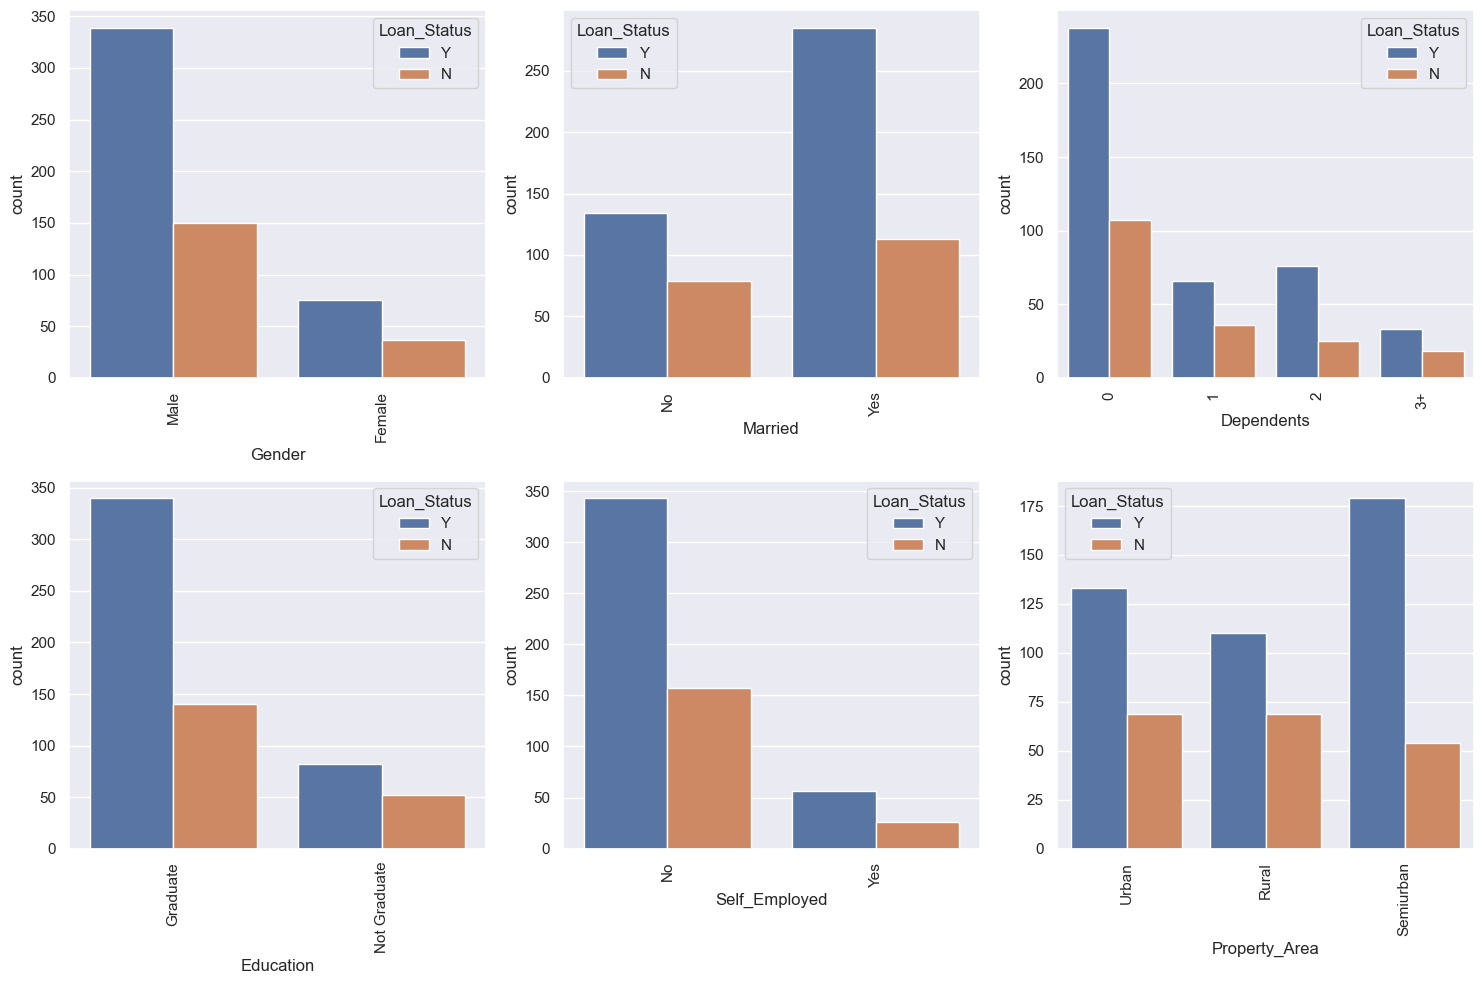

In [16]:
# Get the names of all columns with data type 'object' (categorical variables)
cat_vars = df_train.select_dtypes(include=['object']).columns.tolist()

# Exclude 'Attrition' from the list if it exists in cat_vars
if 'Loan_Status' in cat_vars:
    cat_vars.remove('Loan_Status')

# Create a figure with subplots, but only include the required number of subplots
num_cols = len(cat_vars)
num_rows = (num_cols + 2) // 3  # To make sure there are enough rows for the subplots
fig, axs = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, 5*num_rows))
axs = axs.flatten()

# Create a count plot for the top 6 values of each categorical variable
for i, var in enumerate(cat_vars):
    top_values = df_train[var].value_counts().nlargest(6).index
    filtered_df = df_train[df_train[var].isin(top_values)]
    sns.countplot(x=var, hue='Loan_Status', data=filtered_df, ax=axs[i])
    axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=90)

# Remove any remaining blank subplots
for i in range(num_cols, len(axs)):
    fig.delaxes(axs[i])

# Adjust spacing between subplots
fig.tight_layout()

# Show the plot
plt.show()

### Missing value Analysis

In [17]:
check_missing = df_train.isnull().sum()*100/df_train.shape[0]
check_missing[check_missing>0].sort_values(ascending = False)

Credit_History      8.143322
Self_Employed       5.211726
LoanAmount          3.583062
Dependents          2.442997
Loan_Amount_Term    2.280130
Gender              2.117264
Married             0.488599
dtype: float64

no columns is more than 25% missing values

**fill the categorical missing values**

In [18]:
cat_vars

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

In [19]:
# we will fill the missing value using mode
for i in cat_vars:
    df_train[i].fillna(df_train[i].mode()[0], inplace = True)



**fill the numerical missing value**

In [20]:
# we will fill the missing value using median
for i in num_vars:
    df_train[i].fillna(df_train[i].median(), inplace = True)

In [21]:
df_train.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Lable encoding for categorical datatypes

In [22]:
for col in cat_vars:
    print(f"{col}: {df_train[col].unique()}")

Gender: ['Male' 'Female']
Married: ['No' 'Yes']
Dependents: ['0' '1' '2' '3+']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
Property_Area: ['Urban' 'Rural' 'Semiurban']


In [23]:
from sklearn.preprocessing import LabelEncoder
cat_vars = df_train.select_dtypes(include = ['object'])
# loop over the categorical columns
for col in cat_vars:
    # Initialize the LabelEncoder object
    label_encoder  = LabelEncoder()

    # fit the encoder to the unique values in the columns
    label_encoder.fit(df_train[col].unique())

    # Transform the column using the encoder
    df_train[col] = label_encoder.transform(df_train[col])

    # print the columns name and the unique encoded values
    print(f"{col}: {df_train[col].unique()}")

Gender: [1 0]
Married: [0 1]
Dependents: [0 1 2 3]
Education: [0 1]
Self_Employed: [0 1]
Property_Area: [2 0 1]
Loan_Status: [1 0]


### Correlation Heatmap

In [24]:
df_train

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,1


<Axes: >

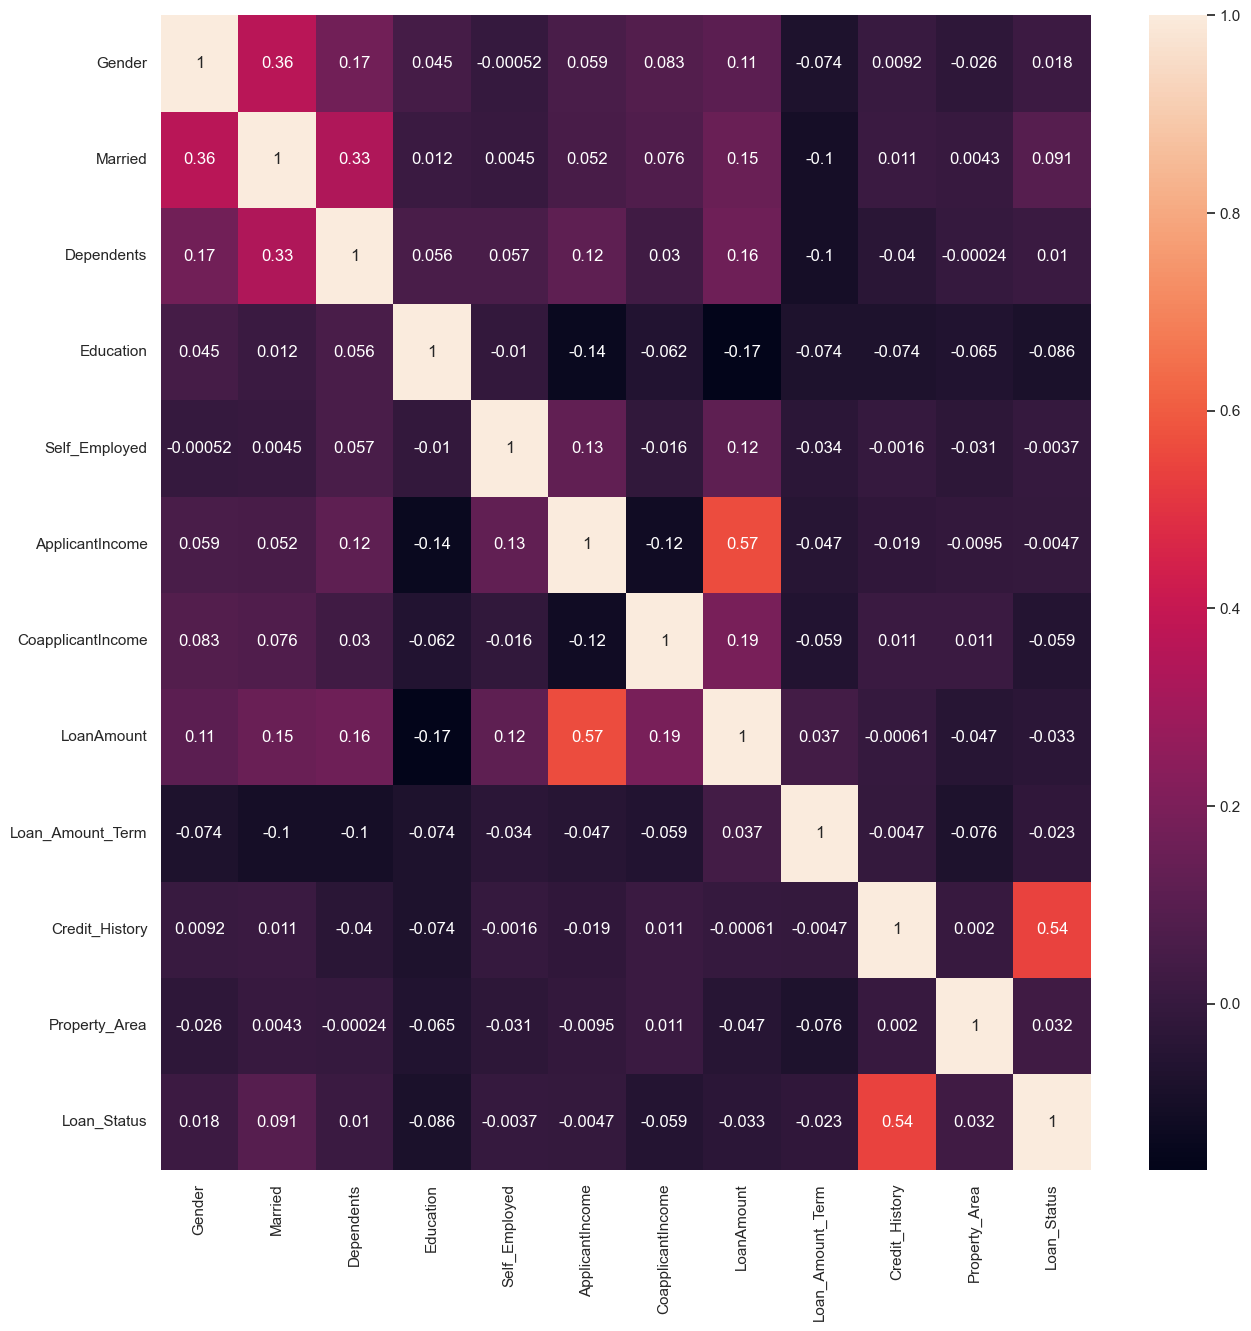

In [25]:
# corr heatmap
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(), annot=True)

In [26]:
df_train.to_csv('Preprocessed_data.csv')

## Model development

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [62]:
X_train = df_train.drop('Loan_Status', axis = 1)
y_train = df_train['Loan_Status']

### Remove Outlier from Train Data using Z-Score

In [63]:
from scipy import stats

# define the columns you want to remove outliers
selected_columns = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']

# Calculate the Z-score for the selected columns in the training data
z_scores = np.abs(stats.zscore(X_train[selected_columns]))

# select the threshold value for outliers detection 
threshold = 3

# find the indices of the outliers based on the threshold
outliers_indeces = np.where(z_scores>threshold)[0]

# remove the outliers from the  training data
X_train = X_train.drop(X_train.index[outliers_indeces])
y_train = y_train.drop(y_train.index[outliers_indeces])



####  Model development
**Decision Tree**

- Model development: X_train,Y_train
- Predictions on: X_test
- Metrics: Predictions and y_test



**decision tree without hyper parameter**

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(X_train,y_train)

DecisionTreeClassifier()

123

In [122]:
# prediction
y_pred_dt = dtree.predict(X_test)

Y_pred = pd.DataFrame(y_pred_dt, columns=['Loan_Status'])
Y_pred['Loan_Status'] = Y_pred['Loan_Status'].replace({0: 'N', 1: 'Y'})
Y_pred

,Loan_Status
0,Y
1,Y
2,Y
3,Y
4,N
...,...
362,Y
363,Y
364,Y
365,N


In [123]:
df = pd.read_csv('test.csv')
Loan_ID = df[['Loan_ID']]
Loan_ID 

,Loan_ID
0,LP001015
1,LP001022
2,LP001031
3,LP001035
4,LP001051
...,...
362,LP002971
363,LP002975
364,LP002980
365,LP002986


In [124]:
concatenated_df = pd.concat([Loan_ID, Y_pred], axis=1)
concatenated_df.to_csv('final.csv', index = False)

**decision tree with hyperparamter**

In [125]:
# import the necessary packages
from sklearn.model_selection import GridSearchCV, cross_val_score


In [126]:
# read the base model
grid_tree = DecisionTreeClassifier()
grid_tree

DecisionTreeClassifier()

In [127]:
# create the paramters
grid_tree.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [128]:
## create dictionary using hyper paramters
param_grid = {
    "criterion":['gini','entropy'], # 2
    'max_depth': [3, 4, 5, 6, 7, 8], # 6
    'min_samples_split': [2, 3, 4],  # 3
    'min_samples_leaf': [1, 2, 3, 4], # 4
    'random_state': [0, 42] # 2
}

In [129]:
## apply grid search CV
grid_search = GridSearchCV(grid_tree, param_grid, scoring='accuracy', cv = 5, verbose = True)
grid_search

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [130]:
# fit the data
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'random_state': [0, 42]},
             scoring='accuracy', verbose=True)

In [131]:
# get the best estimators
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [132]:
grid_search.best_score_

0.8115601912212081

In [133]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'random_state': 0}

In [134]:
## cross_val_score

accuracy_list= cross_val_score(grid_search.best_estimator_, X_train, y_train, cv =5, scoring = 'accuracy')
accuracy_list

array([0.81355932, 0.78813559, 0.77966102, 0.8559322 , 0.82051282])

In [135]:
accuracy_list.mean()

0.8115601912212081

In [181]:
# again fit the model using best paramter
dtree_H = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
dtree_H.fit(X_train, y_train)
y_pred_dt_H = dtree_H.predict(X_test)
y_pred_dt_H

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [50]:
# metrics
acc_dt= round(accuracy_score(y_test,y_pred_dt)*100,2)
f1_dt=round(f1_score(y_test,y_pred_dt)*100,2)
precision_dt=round(precision_score(y_test,y_pred_dt)*100,2)
recall_dt=round(recall_score(y_test,y_pred_dt)*100,2)

``
print("accuray is:",acc_dt)
print("F1 is:",f1_dt)
print("Precision is:",precision_dt)
print("Recall is:",recall_dt)
print(classification_report(y_test,y_pred_dt))

accuray is: 77.24
F1 is: 84.62
Precision is: 75.49
Recall is: 96.25
              precision    recall  f1-score   support

           0       0.86      0.42      0.56        43
           1       0.75      0.96      0.85        80

    accuracy                           0.77       123
   macro avg       0.81      0.69      0.70       123
weighted avg       0.79      0.77      0.75       123



In [184]:
# prediction
y_pred_dt_H = dtree.predict(X_test)

Y_pred = pd.DataFrame(y_pred_dt_H, columns=['Loan_Status'])
Y_pred['Loan_Status'] = Y_pred['Loan_Status'].replace({0: 'N', 1: 'Y'})

df = pd.read_csv('test.csv')
Loan_ID = df[['Loan_ID']]
Loan_ID 

concatenated_df = pd.concat([Loan_ID, Y_pred], axis=1)
concatenated_df.to_csv('final4.csv', index = False)

In [51]:
test_df = pd.read_csv('test.csv')
test_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [52]:
Loan_id = test_df['Loan_ID']
test_df.drop('Loan_ID', axis = 1, inplace=True)

In [53]:
cat_vars = test_df.select_dtypes(include='object')
for col in cat_vars:
    print(f"{col}: {test_df[col].unique()}")

Gender: ['Male' 'Female' nan]
Married: ['Yes' 'No']
Dependents: ['0' '1' '2' '3+' nan]
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes' nan]
Property_Area: ['Urban' 'Semiurban' 'Rural']


In [56]:
# we will fill the missing value using mode
for i in cat_vars:
    test_df[i].fillna(test_df[i].mode()[0], inplace = True)

# we will fill the missing value using median
for i in num_vars:
    test_df[i].fillna(test_df[i].median(), inplace = True)

In [59]:
from sklearn.preprocessing import LabelEncoder
cat_vars = test_df.select_dtypes(include = ['object'])
# loop over the categorical columns
for col in cat_vars:
    # Initialize the LabelEncoder object
    label_encoder  = LabelEncoder()

    # fit the encoder to the unique values in the columns
    label_encoder.fit(test_df[col].unique())

    # Transform the column using the encoder
    test_df[col] = label_encoder.transform(test_df[col])

    # print the columns name and the unique encoded values
    print(f"{col}: {test_df[col].unique()}")

Gender: [1 0]
Married: [1 0]
Dependents: [0 1 2 3]
Education: [0 1]
Self_Employed: [0 1]
Property_Area: [2 1 0]


In [68]:
X_test = test_df
X_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,1,0,0,0,5720,0,110.0,360.0,1.0,2
1,1,1,1,0,0,3076,1500,126.0,360.0,1.0,2
2,1,1,2,0,0,5000,1800,208.0,360.0,1.0,2
3,1,1,2,0,0,2340,2546,100.0,360.0,1.0,2
4,1,0,0,1,0,3276,0,78.0,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
362,1,1,3,1,1,4009,1777,113.0,360.0,1.0,2
363,1,1,0,0,0,4158,709,115.0,360.0,1.0,2
364,1,0,0,0,0,3250,1993,126.0,360.0,1.0,1
365,1,1,0,0,0,5000,2393,158.0,360.0,1.0,0


## Logistics Regression without hyperparameter

In [145]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train ,y_train)

LogisticRegression()

In [148]:
y_predict_LR = LR.predict(X_test)

In [149]:


Y_pred = pd.DataFrame(y_predict_LR, columns=['Loan_Status'])
Y_pred['Loan_Status'] = Y_pred['Loan_Status'].replace({0: 'N', 1: 'Y'})

df = pd.read_csv('test.csv')
Loan_ID = df[['Loan_ID']]
Loan_ID 

concatenated_df = pd.concat([Loan_ID, Y_pred], axis=1)
concatenated_df.to_csv('final1.csv', index = False)

In [153]:
concatenated_df.sample(20)

,Loan_ID,Loan_Status
27,LP001169,Y
246,LP002358,Y
344,LP002876,Y
133,LP001735,Y
192,LP002069,N
90,LP001475,Y
238,LP002326,Y
241,LP002339,N
49,LP001270,Y
122,LP001651,Y


### Logistics Regression with hyperparamter

In [154]:
from sklearn.model_selection import GridSearchCV, cross_val_score
log_reg = LogisticRegression()
log_params = [keys for  keys in log_reg.get_params()]
print("Available paramters for model: ", log_params)

Available paramters for model:  ['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start']


In [157]:
param_grid = {
    'C' : [0.001,0.01,0.1,1,10,100],
    'penalty': ['l1','l2'],
    'max_iter': [100,200,300]
}
print("Processing parameter are:",param_grid)

Processing parameter are: {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'], 'max_iter': [100, 200, 300]}


In [158]:
grid_search = GridSearchCV(log_reg, param_grid, scoring='accuracy', cv=5, verbose=5)

In [159]:
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[CV 1/5] END ...C=0.001, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 3/5] END ...C=0.001, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 4/5] END ...C=0.001, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 5/5] END ...C=0.001, max_iter=100, penalty=l1;, score=nan total time=   0.0s
[CV 1/5] END .C=0.001, max_iter=100, penalty=l2;, score=0.695 total time=   0.1s
[CV 2/5] END .C=0.001, max_iter=100, penalty=l2;, score=0.695 total time=   0.0s
[CV 3/5] END .C=0.001, max_iter=100, penalty=l2;, score=0.695 total time=   0.0s
[CV 4/5] END .C=0.001, max_iter=100, penalty=l2;, score=0.686 total time=   0.0s
[CV 5/5] END .C=0.001, max_iter=100, penalty=l2;, score=0.692 total time=   0.0s
[CV 1/5] END ...C=0.001, max_iter=200, penalty=l1;, score=nan total time=   0.0s
[CV 2/5] END ...C=0.001, max_iter=200, penalty=

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=5)

In [164]:
best_params = grid_search.best_params_
best_params
grid_search.best_params_

{'C': 10, 'max_iter': 200, 'penalty': 'l2'}

In [163]:
best_score = grid_search.best_score_
best_score_

0.8149500217296828

In [170]:
LRH = LogisticRegression(C= 1.0, max_iter= 100, penalty= 'l2',verbose=0)
LRH.fit(X_train ,y_train)
y_predict_LRH = LRH.predict(X_test)

In [171]:
Y_pred_LRH = pd.DataFrame(y_predict_LRH, columns=['Loan_Status'])
Y_pred_LRH['Loan_Status'] = Y_pred_LRH['Loan_Status'].replace({0: 'N', 1: 'Y'})

df = pd.read_csv('test.csv')
Loan_ID = df[['Loan_ID']]
Loan_ID 

concatenated_df = pd.concat([Loan_ID, Y_pred_LRH], axis=1)
concatenated_df.to_csv('final2.csv', index = False)